<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-audios-csv" data-toc-modified-id="Load-audios-csv-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load audios csv</a></span><ul class="toc-item"><li><span><a href="#Encoding" data-toc-modified-id="Encoding-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Classification-with-KERAS" data-toc-modified-id="Classification-with-KERAS-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Classification with KERAS</a></span><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Features</a></span></li></ul></li></ul></li><li><span><a href="#30sec-audio-csv" data-toc-modified-id="30sec-audio-csv-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>30sec audio csv</a></span><ul class="toc-item"><li><span><a href="#Encoding" data-toc-modified-id="Encoding-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Classification-with-KERAS" data-toc-modified-id="Classification-with-KERAS-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Classification with KERAS</a></span></li></ul></li><li><span><a href="#One-min-audio-csv" data-toc-modified-id="One-min-audio-csv-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>One min audio csv</a></span><ul class="toc-item"><li><span><a href="#Encoding" data-toc-modified-id="Encoding-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Classification-with-KERAS" data-toc-modified-id="Classification-with-KERAS-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Classification with KERAS</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from keras import models
from keras import layers

In [3]:
import matplotlib.pyplot as plt

#  Load audios csv

In [5]:
df = pd.read_csv("output/even_more_features_15s_025ov.csv")

In [6]:
df.shape

(1589, 54)

In [7]:
df = df.drop(['sample','sr'],axis=1)

In [8]:
df.label.value_counts()

Beautiful       360
Drama           290
Adventure       270
Action          266
Horror          265
Supernatural    138
Name: label, dtype: int64

In [9]:
df = df[df.label.isin(['Action', 'Beautiful', "Adventure"])]

In [10]:
df.shape

(896, 52)

## Encoding

In [11]:
genre_list = df['label']
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [12]:
from keras.utils import np_utils

In [13]:
y= np_utils.to_categorical(y)

In [14]:
y.shape

(896, 3)

In [15]:
X = df.drop(['label'],axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Classification with KERAS

In [17]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(y.shape[-1], activation='softmax'))

In [18]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               13312     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

In [19]:
network.compile(optimizer='adam',
              loss='categorical_crossentropy',
               metrics=['accuracy'])

In [20]:
history = network.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128,
                     validation_data=(X_test,y_test))


Epoch 1/100
6/6 [==============================] - 1s 40ms/step - loss: 1.1650 - accuracy: 0.3560 - val_loss: 0.9000 - val_accuracy: 0.6500
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9028 - accuracy: 0.5658 - val_loss: 0.8136 - val_accuracy: 0.6500
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.8276 - accuracy: 0.6409 - val_loss: 0.7547 - val_accuracy: 0.6889
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7649 - accuracy: 0.6713 - val_loss: 0.7275 - val_accuracy: 0.7222
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.7554 - accuracy: 0.6734 - val_loss: 0.7135 - val_accuracy: 0.7167
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7140 - accuracy: 0.6935 - val_loss: 0.6980 - val_accuracy: 0.7222
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6824 - accuracy: 0.7275 - val_loss: 0.6899 - val_accuracy: 0.7222
Epoch 8/100
6/6 [=========

6/6 [==============================] - 0s 7ms/step - loss: 0.1793 - accuracy: 0.9213 - val_loss: 0.7567 - val_accuracy: 0.7778
Epoch 60/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1895 - accuracy: 0.9290 - val_loss: 0.7557 - val_accuracy: 0.7833
Epoch 61/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2057 - accuracy: 0.9132 - val_loss: 0.7590 - val_accuracy: 0.7833
Epoch 62/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2021 - accuracy: 0.9176 - val_loss: 0.7880 - val_accuracy: 0.7889
Epoch 63/100
6/6 [==============================] - 0s 6ms/step - loss: 0.2041 - accuracy: 0.9168 - val_loss: 0.7911 - val_accuracy: 0.7611
Epoch 64/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1944 - accuracy: 0.9286 - val_loss: 0.8011 - val_accuracy: 0.7611
Epoch 65/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1623 - accuracy: 0.9380 - val_loss: 0.8047 - val_accuracy: 0.7778
Epoch 66/100
6/6 [===============

In [22]:
test_loss, test_acc = network.evaluate(X_test,y_test)

6/6 [==============================] - 0s 763us/step - loss: 0.9415 - accuracy: 0.7889


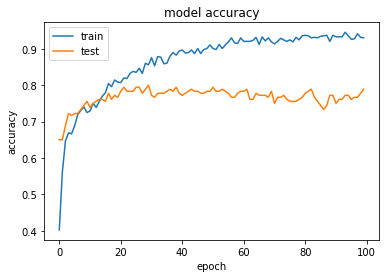

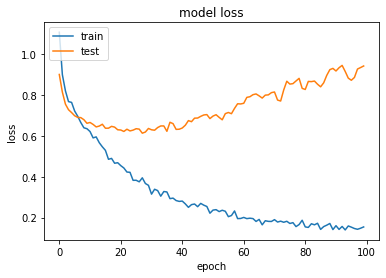

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Features
- Frequency (notes, keys, scales)
- Rhythm (tempo, speed, speed-changes)
- Amplitude (volume, changes in volume)

# 30sec audio csv

In [ ]:
df_30 = pd.read_csv("output/new_features_30.csv")

In [ ]:
df_30.shape

In [ ]:
df_30 = df_30.drop(['sample','sr'],axis=1)

## Encoding

In [ ]:
genre_list_30 = df_30['label']
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list_30)
y = np_utils.to_categorical(y)

In [ ]:
X = df_30.drop(['label'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Classification with KERAS

In [ ]:
from keras import models
from keras import layers

network_30 = models.Sequential()
network_30.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

network_30.add(layers.Dense(128, activation='relu'))

network_30.add(layers.Dense(64, activation='relu'))

network_30.add(layers.Dense(6, activation='softmax'))

In [ ]:
network_30.summary()

In [ ]:
network_30.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_30 = network_30.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)


In [ ]:
test_loss, test_acc = network_30.evaluate(X_test,y_test)

# One min audio csv

In [ ]:
df_1m = pd.read_csv("output/new_features_60s_030ov.csv")

In [ ]:
df_1m.shape

In [ ]:
df_1m = df_1m.drop(['sample','sr'],axis=1)

## Encoding

In [ ]:
genre_list_30 = df_1m['label']
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list_30)

In [ ]:
X = df_1m.drop(['label'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Classification with KERAS

In [ ]:
from keras import models
from keras import layers

network_1m = models.Sequential()
network_1m.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

network_1m.add(layers.Dense(128, activation='relu'))

network_1m.add(layers.Dense(64, activation='relu'))

network_1m.add(layers.Dense(6, activation='softmax'))

In [ ]:
network_1m.summary()

In [ ]:
network_1m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_1m = network_1m.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)


In [ ]:
test_loss, test_acc = network_1m.evaluate(X_test,y_test)